In [118]:
import pylab as pl
import pandas as pd
import numpy as np
import os
import scipy.stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# My Parameter Distribution

In [119]:
np.random.seed(150)
mean = 144
sigma = 12
N = 100

norm = np.random.normal(mean, sigma, N)

(array([  3.,   7.,   9.,  16.,  28.,  12.,  11.,   9.,   4.,   1.]),
 array([ 111.90903035,  118.34955857,  124.79008679,  131.230615  ,
         137.67114322,  144.11167143,  150.55219965,  156.99272786,
         163.43325608,  169.87378429,  176.31431251]),
 <a list of 10 Patch objects>)

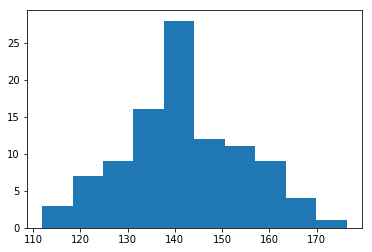

In [120]:
plt.hist(norm)

### Figure 1 shows the distribution of my control parameters. The distribution is Gaussian, with a mean of 144 and a standard deviation of 12

# Generating my Random Poisson Distributions

In [128]:
np.random.seed(150)

lamda = mean

mydict = {}
mydict['pois'] = {} 
mydict['pois']['means'] = {}

for i in range(100):
    mydict['pois'][i] = np.random.poisson(lamda, size= N)

for q in mydict['pois']:
    if not type(q) == str:
        mydict['pois']['means'][q] = mydict['pois'][q].mean()
        
mymeans = mydict['pois']['means'].values()

# Plotting one of the samples

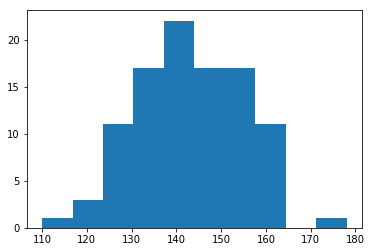

In [129]:
plt.hist(mydict['pois'][0]);

### Figure 2 is a histogram of one of my 100 randomly generated Poisson distributions

## Set up my Z-Test

In [130]:
def ztest(m):
    """Runs the z test"""
    z = (mean - m) / sigma * sqrt(n)
    return z

# Plotting my Z-Score distribution

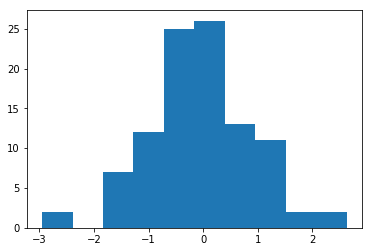

In [131]:
zscores = []

for m in mymeans:
    zscore = ztest(m)
    zscores.append(zscore)
    
plt.hist(zscores);

### Figure 3 shows the distribution of the z-scores calculated for each of my 100 sample distributions

## Fit the Z-Score Distribution with a Gaussian Distribution of N(0,1)

## $H_0$: My sample distribution ('zscores') comes from a normal distribution, N(0,1)
$\alpha = 0.05$

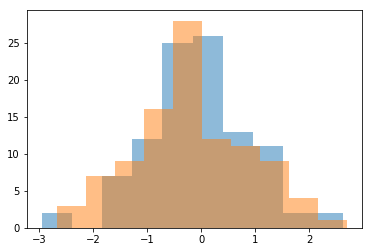

In [133]:
np.random.seed(150)
N_0 = np.random.normal(0, 1, 100)
plt.hist(zscores, alpha = .5)
plt.hist(N_0, alpha = .5);

### Figure 4 fits a Gaussian distribution (mean = 0, standard deviation = 1) over my z-score distribution 

## Assess Goodness of Fit with KS and AD tests


In [134]:
print ("z-scores on normal", scipy.stats.kstest(zscores, 'norm'))
print ("z-scores on normal", scipy.stats.anderson(zscores, dist='norm'))

('z-scores on normal', KstestResult(statistic=0.080107355947104053, pvalue=0.52586382133535192))
('z-scores on normal', AndersonResult(statistic=0.48620799130414127, critical_values=array([ 0.555,  0.632,  0.759,  0.885,  1.053]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ])))


### Based on the KS test, we are unable to reject $H_0$ because the p-value (0.52) is greater than our selected p-value (0.05).

### Based on the AD test, we are unable to reject $H_0$ because the critical value (0.486) is not higher than the necessary critical value for our selected p-value (0.736).

## find the best fit values for the model parameters (mean and standard deviation) by minimizing the model chi square.

In [139]:
scipy.stats.chisquare?